In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('Data/HR_comma_sep.csv')
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
df.groupby('left').mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321

<AxesSubplot:xlabel='salary'>

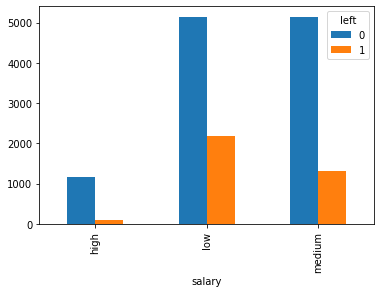

In [5]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Work_accident'>

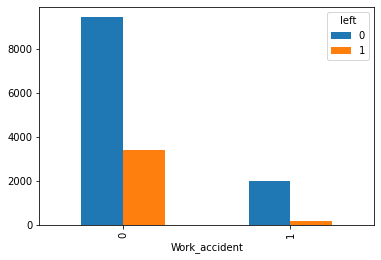

In [6]:
pd.crosstab(df.Work_accident,df.left).plot(kind='bar')

<AxesSubplot:xlabel='Department'>

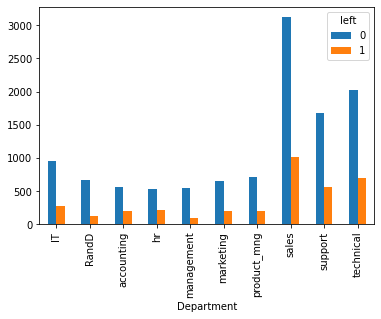

In [7]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [11]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','Work_accident']]
subdf.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   Work_accident  
0              0  
1              0  
2              0  
3              0  
4              0

In [13]:
salary_dummy = pd.get_dummies(subdf.salary, prefix='salary')

In [15]:
df_with_dummy = pd.concat([subdf,salary_dummy], axis='columns')
df_with_dummy.head()

satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                0.38                   157                      0     low   
1                0.80                   262                      0  medium   
2                0.11                   272                      0  medium   
3                0.72                   223                      0     low   
4                0.37                   159                      0     low   

   Work_accident  salary_high  salary_low  salary_medium  
0              0            0           1              0  
1              0            0           0              1  
2              0            0           0              1  
3              0            0           1              0  
4              0            0           1              0

In [18]:
final = df_with_dummy.drop(['salary','salary_medium'], axis='columns')
final.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   Work_accident  salary_high  salary_low  
0              0            0           1  
1              0            0           0  
2              0            0           0  
3              0            0           1  
4              0            0           1

In [19]:
x = final
x.head()

satisfaction_level  average_montly_hours  promotion_last_5years  \
0                0.38                   157                      0   
1                0.80                   262                      0   
2                0.11                   272                      0   
3                0.72                   223                      0   
4                0.37                   159                      0   

   Work_accident  salary_high  salary_low  
0              0            0           1  
1              0            0           0  
2              0            0           0  
3              0            0           1  
4              0            0           1

In [20]:
y = df.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.3)

In [26]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
model.score(x_test,y_test)

0.7782857142857142